In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt; plt.rcdefaults()


from sklearn import datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split 

from skimage import io, transform, color, exposure, img_as_float
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import classification_report

In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')



/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4096) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
#dataset size

train_shape = train.shape
test_shape = test.shape

dataset_size = (train_shape[0]+test_shape[0],test_shape[1])

print(dataset_size)


(2400, 12289)


In [10]:
#classes 
classes = []
for i in test['label']:
  if i not in classes and str(i)!= 'nan':
      classes.append(i)

print(classes)
print(len(classes))

['bear', 'boa-constrictor', 'bullfrog', 'golden-retriever', 'goldfish']
5


In [ ]:
#(1)
#dataset_size = (2029, 12289)

# here separate batch for train, test but no batch for validation. we have to do it manually for validation only.

#total five class ['bear', 'boa-constrictor', 'bullfrog', 'golden-retriever', 'goldfish']
# [unfortunately one NaN class both in train and test batch (wd didnot consider it)]



{'Train': [500, 399, 250, 494, 500], 'Test': [49, 50, 50, 50, 50]}


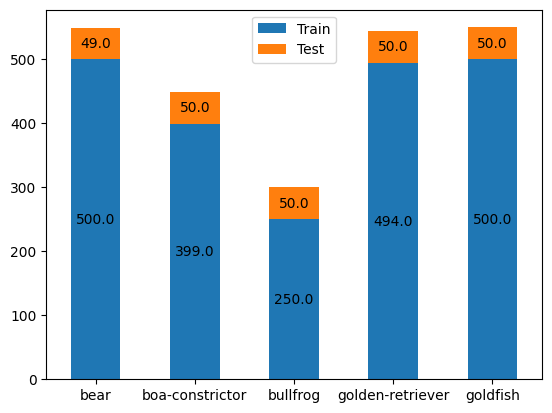

In [11]:
#distribution:

d = {'Train':[],'Test':[]}

for i in classes:
  ctr = 0
  ctt = 0
  for j in train['label']:
    if i == j:
      ctr+=1
  for j in test['label']:
    if i == j:
      ctt+=1
  d['Train'].append(ctr)
  d['Test'].append(ctt)

print(d)

Class =  classes

# Plot stacked bar chart

df = pd.DataFrame(d)
ax = df.plot(stacked=True, kind='bar')

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    
# Set Tick labels


ax.set_xticklabels(Class,rotation='horizontal')

# Display chart


plt.show()

{'bear': 549, 'boa-constrictor': 449, 'bullfrog': 300, 'golden-retriever': 544, 'goldfish': 550}


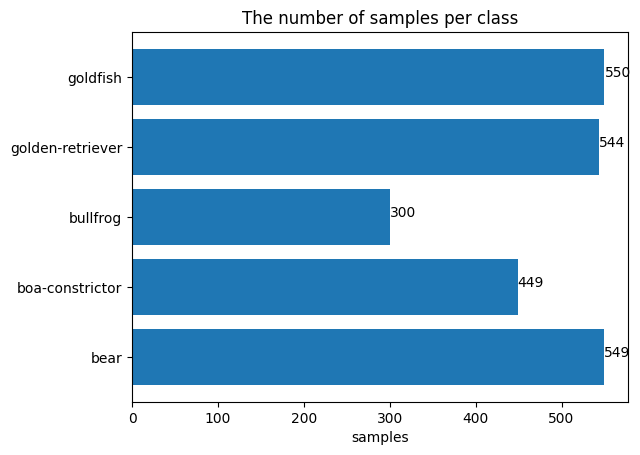

In [12]:
#distribution:

d = {}

for i in classes:
  c = 0
 
  for j in train['label']:
    if i == j:
      c+=1
  for j in test['label']:
    if i == j:
      c+=1
  d[i] = c

print(d)

x = d.keys()
y = d.values()
plt.barh(list(x), list(y))
 
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))

plt.xlabel('samples')
plt.title('The number of samples per class')
 
plt.show()

In [ ]:
#(2) 
# the distribution is like {'bear': 549, 'boa-constrictor': 449, 'bullfrog': 300, 'golden-retriever': 544, 'goldfish': 178}
# distribution is inbalanced 



In [ ]:
#(3) If a dataset is unbalanced, what kind of issues we might face? What are the available techniques to tackle these issues [Google and answer]?

#If dataset is unbalanced then its hard to solve classification type problem because Imbalance data can hamper the model accuracy in a large scale. Here the model
# will train and predict well for data-label with high volume but the model wont train and predict well and loss will be higher for data-label with low volume.

#Resampling Technique (over sampling , under sampling), data augmentation  

In [ ]:
#(4)  data augmentation

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


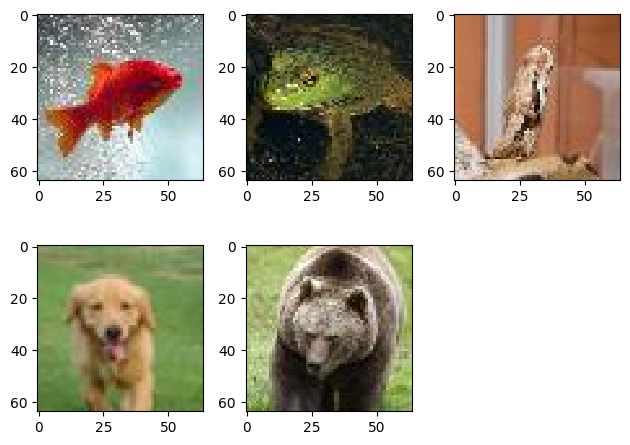

In [ ]:
#Review some sample images
goldfish = io.imread('n01443537_10.JPEG')

bullfrog = io.imread('n01641577_9.JPEG')
boa_constrictor  = io.imread('n01742172_96.JPEG')
golden_retriever = io.imread('n02099601_5.JPEG')
bear = io.imread('n02132136_32.JPEG')

plt.subplot(2,3,1)
io.imshow(goldfish )
plt.subplot(2,3,2)
io.imshow(bullfrog)
plt.subplot(2,3,3)
io.imshow(boa_constrictor)
plt.subplot(2,3,4)
io.imshow(golden_retriever)
plt.subplot(2,3,5)
io.imshow(bear)


print(goldfish.shape)
print(bullfrog.shape)
print(boa_constrictor.shape)
print(golden_retriever.shape)
print(bear.shape)

In [ ]:
#(5)

#size of of the image is (64, 64, 3)
#color image
# ............................


In [13]:
#(6)
train = train.dropna(axis = 0, how ='any') 
test  = test.dropna(axis = 0, how ='any') 


print(train.shape)
print(test.shape)

(2143, 12289)
(249, 12289)


In [14]:

y_train = train['label']
X_train = train.drop(['label'],axis=1)

y_test = test['label']
X_test = test.drop(['label'],axis=1)


In [15]:
ytr = []
ytt = []
for i in y_train:
  ytr.append(classes.index(i))
for i in y_test:
  ytt.append(classes.index(i))



In [16]:
ytr = pd.DataFrame(ytr,columns = ['label'])
ytt = pd.DataFrame(ytt,columns = ['label'])



In [17]:
X_train_norm = preprocessing.minmax_scale(X_train)
X_test_norm = preprocessing.minmax_scale(X_test)

X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm , columns=X_test.columns)




In [18]:
model = linear_model.LogisticRegression(C=100, fit_intercept=True, solver='lbfgs', max_iter=300)
model = model.fit(X_train_norm, ytr)
y_predict = model.predict(X_test_norm)
y_predict_train = model.predict(X_train_norm)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
acc_training = np.mean(np.array(ytr) == y_predict_train)*100
acc_testing = np.mean(np.array(ytt) == y_predict)*100
#print("Training accuracy (%) =", acc_training)
#print("Testing accuracy (%) =", acc_testing)

#y_pred = model.predict(X_test_norm)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_norm, ytt)*100))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(model.score(X_train_norm, ytr)*100))

Accuracy of logistic regression classifier on test set: 35.74
Accuracy of logistic regression classifier on train set: 100.00


In [ ]:
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train_norm, ytr, test_size=0.20, random_state=100)

model = linear_model.LogisticRegression(C=100, fit_intercept=True, solver='lbfgs', max_iter=100)
model = model.fit(X_train_1, y_train_1)
y_predict_val = model.predict(X_val)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
mse_val = np.mean((np.array(y_val) - np.array(y_predict_val))**2)
print('validation loss : ', mse_val)
print('Accuracy of logistic regression classifier validation data: {:.2f}'.format(model.score(X_val, y_val)*100))


validation loss :  4.686906721871757
Accuracy of logistic regression classifier validation data: 45.22


In [20]:
cm_test = confusion_matrix(ytt, y_predict)
cm_train = confusion_matrix(ytr, y_predict_train)
print(cm_train)


[[500   0   0   0   0]
 [  0 399   0   0   0]
 [  0   0 250   0   0]
 [  0   0   0 494   0]
 [  0   0   0   0 500]]


In [23]:
cal_d_test = {}
for i in range(len(classes)):
  cal_d_test[classes[i]] = []
  TP = cm_test[i][i]
  FN = 0
  FP = 0
  TN = 0

  for j in cm_test[i]:
    FN+=j
  FN = FN - TP
  
  for j in range(len(classes)):
    FP += cm_test[j][i]
  FP = FP - TP

  for x in range(len(classes)):
    for y in range(len(classes)):
      TN += cm_test[x][y]
  TN = TN - TP - FN - FP


  sensitivity = TP/(TP+FN)
  specificity = TN/(TN+FP)
  ppv = TP/(TP+FP)
  npv = TN/(TN+FN)
  f1 = 2*(ppv*sensitivity)/(ppv+sensitivity)
  cal_d_test[classes[i]].append(sensitivity)
  cal_d_test[classes[i]].append(specificity)
  cal_d_test[classes[i]].append(ppv)
  cal_d_test[classes[i]].append(npv)
  cal_d_test[classes[i]].append(f1)





cal_d_train = {}
for i in range(len(classes)):
  cal_d_train[classes[i]] = []
  TP = cm_train[i][i]
  FN = 0
  FP = 0
  TN = 0

  for j in cm_train[i]:
    FN+=j
  FN = FN - TP
  
  for j in range(len(classes)):
    FP += cm_train[j][i]
  FP = FP - TP

  for x in range(len(classes)):
    for y in range(len(classes)):
      TN += cm_train[x][y]
  TN = TN - TP - FN - FP


  sensitivity = TP/(TP+FN)
  specificity = TN/(TN+FP)
  ppv = TP/(TP+FP)
  npv = TN/(TN+FN)
  f1 = 2*(ppv*sensitivity)/(ppv+sensitivity)
  cal_d_train[classes[i]].append(sensitivity)
  cal_d_train[classes[i]].append(specificity)
  cal_d_train[classes[i]].append(ppv)
  cal_d_train[classes[i]].append(npv)
  cal_d_train[classes[i]].append(f1)



  

In [24]:
print('Train data')
for k,v in cal_d_train.items():
  print(f'Class: {k}, Sensitivity: {v[0]}, Specificity: {v[1]}, PPV: {v[2]}, NPV :{v[3]}, F1:{v[4]}')

print('   ')
print('   ')

print('Test data')
for k,v in cal_d_test.items():
  print(f'Class: {k}, Sensitivity: {v[0]}, Specificity: {v[1]}, PPV: {v[2]}, NPV :{v[3]}, F1:{v[4]}')

Train data
Class: bear, Sensitivity: 1.0, Specificity: 1.0, PPV: 1.0, NPV :1.0, F1:1.0
Class: boa-constrictor, Sensitivity: 1.0, Specificity: 1.0, PPV: 1.0, NPV :1.0, F1:1.0
Class: bullfrog, Sensitivity: 1.0, Specificity: 1.0, PPV: 1.0, NPV :1.0, F1:1.0
Class: golden-retriever, Sensitivity: 1.0, Specificity: 1.0, PPV: 1.0, NPV :1.0, F1:1.0
Class: goldfish, Sensitivity: 1.0, Specificity: 1.0, PPV: 1.0, NPV :1.0, F1:1.0
   
   
Test data
Class: bear, Sensitivity: 0.3877551020408163, Specificity: 0.825, PPV: 0.35185185185185186, NPV :0.8461538461538461, F1:0.36893203883495146
Class: boa-constrictor, Sensitivity: 0.26, Specificity: 0.8442211055276382, PPV: 0.29545454545454547, NPV :0.8195121951219512, F1:0.27659574468085113
Class: bullfrog, Sensitivity: 0.2, Specificity: 0.9195979899497487, PPV: 0.38461538461538464, NPV :0.820627802690583, F1:0.2631578947368421
Class: golden-retriever, Sensitivity: 0.28, Specificity: 0.7537688442211056, PPV: 0.2222222222222222, NPV :0.8064516129032258, F1:

In [29]:
print('For train data')
print(classification_report(np.array(ytr['label']), y_predict_train, target_names=classes))

For train data
                  precision    recall  f1-score   support

            bear       1.00      1.00      1.00       500
 boa-constrictor       1.00      1.00      1.00       399
        bullfrog       1.00      1.00      1.00       250
golden-retriever       1.00      1.00      1.00       494
        goldfish       1.00      1.00      1.00       500

        accuracy                           1.00      2143
       macro avg       1.00      1.00      1.00      2143
    weighted avg       1.00      1.00      1.00      2143



In [30]:
print('For test data')
print(classification_report(np.array(ytt['label']), y_predict, target_names=classes))

For test data
                  precision    recall  f1-score   support

            bear       0.35      0.39      0.37        49
 boa-constrictor       0.30      0.26      0.28        50
        bullfrog       0.38      0.20      0.26        50
golden-retriever       0.22      0.28      0.25        50
        goldfish       0.53      0.66      0.59        50

        accuracy                           0.36       249
       macro avg       0.36      0.36      0.35       249
    weighted avg       0.36      0.36      0.35       249



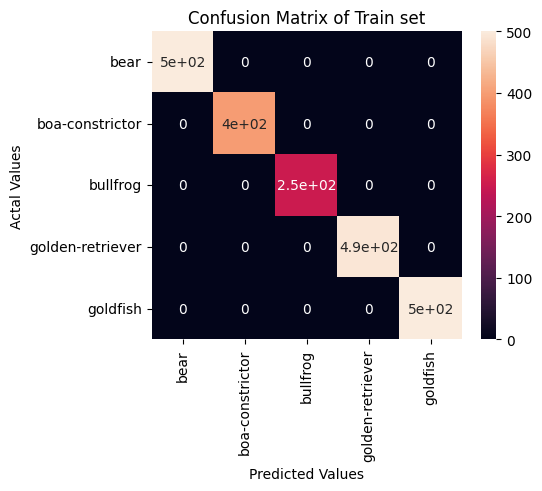

In [27]:
#Plotting the confusion matrix for train data
cm_df = pd.DataFrame(cm_train,
                     index = classes, 
                     columns = classes)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of Train set')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

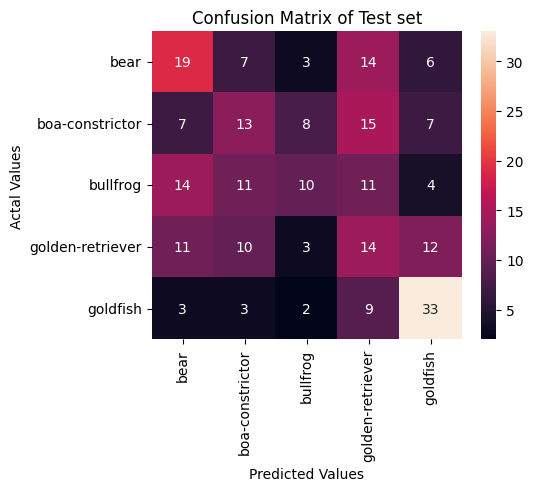

In [28]:
#Plotting the confusion matrix for test data
cm_df = pd.DataFrame(cm_test,
                     index = classes, 
                     columns = classes)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of Test set')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()